In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']
import warnings
warnings.filterwarnings('ignore')
np.random.seed(42)

In [3]:
from sklearn import datasets
iris = datasets.load_iris()

In [4]:
print(iris.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [9]:
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [17]:
# 创建数据 双特征，三类
X = iris['data'][:, 2:]
y = iris['target']
X[:10],y

(array([[1.4, 0.2],
        [1.4, 0.2],
        [1.3, 0.2],
        [1.5, 0.2],
        [1.4, 0.2],
        [1.7, 0.4],
        [1.4, 0.3],
        [1.5, 0.2],
        [1.4, 0.2],
        [1.5, 0.1]]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]))

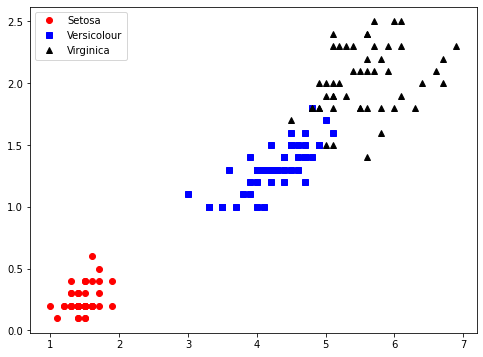

In [22]:
plt.figure(figsize=(8,6))
plt.plot(X[y==0,0],X[y==0,1],'ro',label='Setosa')
plt.plot(X[y==1,0],X[y==1,1],'bs',label='Versicolour')
plt.plot(X[y==2,0],X[y==2,1],'k^',label='Virginica')
plt.legend(loc='upper left')

In [74]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression(solver='lbfgs',multi_class='multinomial', max_iter=1000, C=100000) # C:正则化惩罚程度，越大惩罚越小
logistic.fit(X,y)

LogisticRegression(C=100000, max_iter=1000, multi_class='multinomial')

In [75]:
x0,x1 = np.meshgrid(np.linspace(1,6.9,200), np.linspace(0.1,2.5,200))

In [76]:
# x0,x1 = np.meshgrid(np.linspace(0,3,3), np.linspace(1,2,2))
# x0,x1

In [77]:
X_new = np.c_[x0.ravel(), x1.ravel()]
y_new = logistic.predict_proba(X_new)
y_new[:3]

array([[1.00000000e+00, 6.40332871e-13, 1.27458198e-29],
       [1.00000000e+00, 8.31302133e-13, 1.96236673e-29],
       [1.00000000e+00, 1.07922499e-12, 3.02129108e-29]])

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei


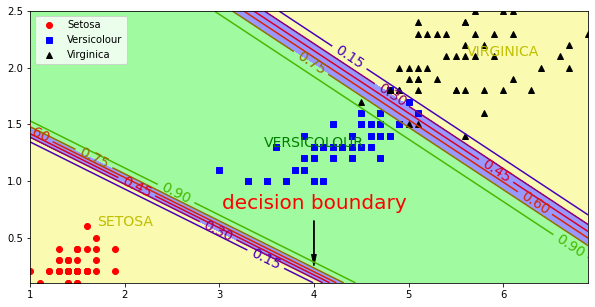

In [88]:
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
# 数据
plt.figure(figsize=(10,5))
plt.plot(X[y==0,0],X[y==0,1],'ro',label='Setosa')
plt.plot(X[y==1,0],X[y==1,1],'bs',label='Versicolour')
plt.plot(X[y==2,0],X[y==2,1],'k^',label='Virginica')
# 等高线
plt.contourf(x0,x1,y_new[:,1].reshape(x0.shape),cmap = custom_cmap)
contour = plt.contour(x0,x1,y_new[:,1].reshape(x0.shape),cmap = plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=14)

plt.text(2,0.6,'SETOSA',fontsize=14,ha='center',color='y')
plt.text(4,1.3,'VERSICOLOUR',fontsize=14,ha='center',color='g')
plt.text(6,2.1,'VIRGINICA',fontsize=14,ha='center',color='y')

plt.arrow(4,0.65,0,-0.3,head_width=0.05,head_length=0.1,fc='k',ec='k')
plt.text(4,0.8,'decision boundary',ha='center',va='center',fontsize=20,color='r')

plt.legend(loc='upper left')